In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
def load_data(fname):
    with open(fname, "r") as f:
        # ignore `vertices: ...` at head and `Total: ..` at tail
        raws = f.readlines()
    header = [i.strip() for i in raws[0].split(',')]
    lines = [[j.strip() for j in i.split(',')] for i in raws[1:]]
    t = pd.DataFrame.from_records(lines, columns=header)
    res = t[header].apply(pd.to_numeric, errors='ignore')
    return res

In [3]:
def load_files(paths):
    frames = []
    for i in paths:
        print(i)
        frames.append(load_data(i))
    res = pd.concat(frames)
    return res

In [4]:
def gen_xy(df=None, colx='', coly='', ignore=True):
    tg = df.groupby(colx)
    x = []
    y = []
    for k, v in tg[coly].apply(lambda _: np.average(_)).items():
        if ignore and tg.size()[int(k)] < 200:
            continue
        x.append(int(k))
        y.append(v)
    return x, y

In [48]:
styles = {}
styles["LVG"] = "ro-"
styles["interval heuristic"] = "g^-"
styles["target heuristic"] = "kx-"
styles["target heuristic call"] = "k*-"
styles["heuristic cost"] = "k^-"
styles["total cost"] = "cD-."
styles["polyanya"] = "bs-"
styles["node push"] = "m|-"
plt.rcParams.update({'font.size': 18})
plt.rc('grid', linestyle="-.", color='gray')
def plot_graph(xlabel='', ylabel='', xs=[[]], ys=[[]], labels=[], color=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    n = len(xs)
    for i in range(n):
        x = xs[i]
        y = ys[i]
        if styles.get(labels[i]) is not None:
            #plt.scatter(x, y, marker=markers[labels[i]], color=colors[labels[i]])
            plt.plot(x, y, styles[labels[i]], label=labels[i])
            #ax.scatter(x, y, color=color)
            #ax.plot(x, y, label=labels[i], color=styles[labels[i]])
        else:
            ax.scatter(x, y)
            ax.plot(x, y, label=labels[i])
    ax.legend(labels)
    ax.legend(loc='best', fancybox=True, framealpha=0)
    plt.grid(True)


# S1: EDBT vs Polyanya

[time] * [vnum, dist, K]

In [42]:
paths = os.listdir('../outputs/s1/')
paths = ['../outputs/s1/' + i for i in paths]

In [43]:
# paths = ['s1-1-300.log', 's1-2-300.log', 's1-3-300.log', 's1-4-300.log', 's1-5-300.log']
df = load_files(paths)
df = df[df.K == df.order]
df.head()

../outputs/s1/8100-4.log
../outputs/s1/6000-8.log
../outputs/s1/8400-8.log
../outputs/s1/7200-10.log
../outputs/s1/7500-4.log
../outputs/s1/6900-8.log
../outputs/s1/7500-6.log
../outputs/s1/3000-10.log
../outputs/s1/7800-10.log
../outputs/s1/8100-6.log
../outputs/s1/4200-4.log
../outputs/s1/8100-10.log
../outputs/s1/7800-8.log
../outputs/s1/3000-4.log
../outputs/s1/5700-8.log
../outputs/s1/3900-6.log
../outputs/s1/9000-6.log
../outputs/s1/9000-4.log
../outputs/s1/3900-4.log
../outputs/s1/5100-10.log
../outputs/s1/3000-6.log
../outputs/s1/4200-6.log
../outputs/s1/8700-10.log
../outputs/s1/6600-6.log
../outputs/s1/4500-8.log
../outputs/s1/6300-10.log
../outputs/s1/5700-10.log
../outputs/s1/6300-8.log
../outputs/s1/6900-10.log
../outputs/s1/6600-4.log
../outputs/s1/8700-8.log
../outputs/s1/7200-8.log
../outputs/s1/4800-4.log
../outputs/s1/9000-10.log
../outputs/s1/7500-10.log
../outputs/s1/5100-6.log
../outputs/s1/3300-6.log
../outputs/s1/3300-4.log
../outputs/s1/5100-4.log
../outputs/s1/

,K,order,dist,cost_ki,cost_edbt,vnum,density
3,4,4,1379.94,46.742,186373.0,4,1.07541
7,4,4,925.29,19.816,51884.1,2,1.07541
11,4,4,1225.90,29.856,122331.0,4,1.07541
15,4,4,1527.86,39.132,132107.0,4,1.07541
19,4,4,1326.32,40.740,214491.0,5,1.07541


In [8]:
df.shape

(16800, 7)

## Graph 1: [time, vnum]

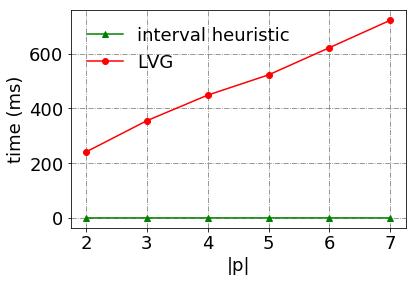

In [9]:
x0, y0 = gen_xy(df, 'vnum', 'cost_ki')
x1, y1 = gen_xy(df, 'vnum', 'cost_edbt')
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1]
plot_graph('|p|', 'time (ms)', [x0, x1], [y0, y1], ['interval heuristic', 'LVG'])

In [54]:
x = [[None, None] for i in range(3)]
y = [[None, None] for i in range(3)]

x[0][0], y[0][0] = gen_xy(df, 'vnum', 'cost_ki')
x[0][1], y[0][1] = gen_xy(df, 'vnum', 'cost_edbt')

df2 = df.copy()
df2.dist = (df.dist / 50).astype(int)
x[1][0], y[1][0] = gen_xy(df2, 'dist', 'cost_ki')
x[1][1], y[1][1] = gen_xy(df2, 'dist', 'cost_edbt')

x[2][0], y[2][0] = gen_xy(df, 'K', 'cost_ki')
x[2][1], y[2][1] = gen_xy(df, 'K', 'cost_edbt')

for i in range(3):
    for j in range(2):
        y[i][j] = np.log10([i / 1000.0 for i in y[i][j]])

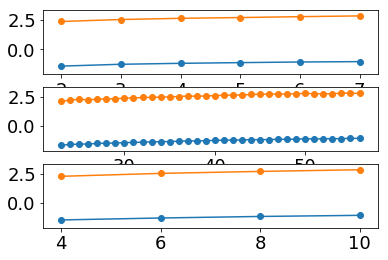

In [57]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey=True)
axs = [ax1, ax2, ax3]

for i in range(3):
    for j in range(2):
        axs[i].plot(x[i][j], y[i][j])
        axs[i].scatter(x[i][j], y[i][j])

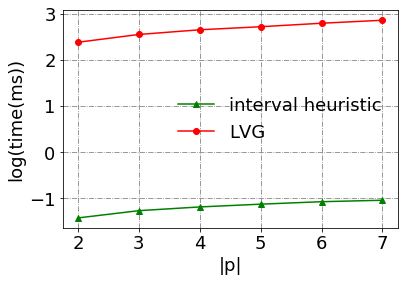

In [10]:
x0, y0 = gen_xy(df, 'vnum', 'cost_ki')
x1, y1 = gen_xy(df, 'vnum', 'cost_edbt')
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1]
y0 = np.log10(y0)
y1 = np.log10(y1)
plot_graph('|p|', 'log(time(ms))', [x0, x1], [y0, y1], ['interval heuristic', 'LVG'])

## Graph 2: [time, dist]

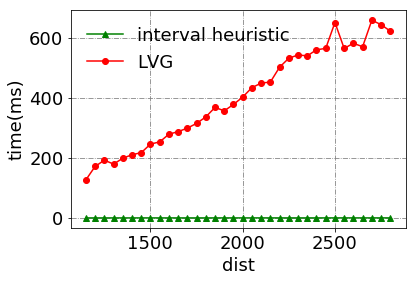

In [11]:
df2 = df.copy()
df2.dist = (df.dist / 50).astype(int)
x0, y0 = gen_xy(df2, 'dist', 'cost_ki')
x1, y1 = gen_xy(df2, 'dist', 'cost_edbt')
x0 = [i * 50 for i in x0]
x1 = [i * 50 for i in x1]
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1]
plot_graph('dist', 'time(ms)', [x0, x1], [y0, y1], ['interval heuristic', 'LVG'])

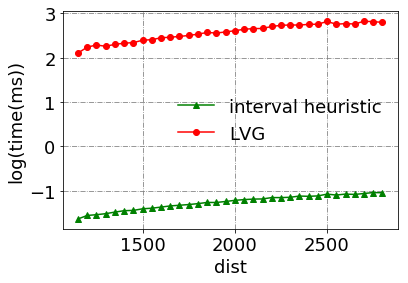

In [12]:
df2 = df.copy()
df2.dist = (df.dist / 50).astype(int)
x0, y0 = gen_xy(df2, 'dist', 'cost_ki')
x1, y1 = gen_xy(df2, 'dist', 'cost_edbt')
x0 = [i * 50 for i in x0]
x1 = [i * 50 for i in x1]
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1]
y0 = np.log10(y0)
y1 = np.log10(y1)
plot_graph('dist', 'log(time(ms))', [x0, x1], [y0, y1], ['interval heuristic', 'LVG'])

## Graph 3: [time, K]

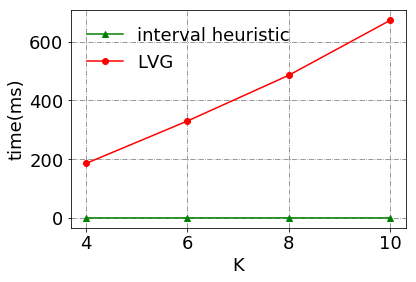

In [13]:
x0, y0 = gen_xy(df, 'K', 'cost_ki')
x1, y1 = gen_xy(df, 'K', 'cost_edbt')
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1]
plot_graph('K', 'time(ms)', [x0, x1], [y0, y1], ['interval heuristic', 'LVG'])

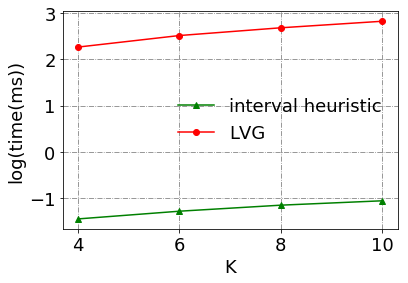

In [14]:
x0, y0 = gen_xy(df, 'K', 'cost_ki')
x1, y1 = gen_xy(df, 'K', 'cost_edbt')
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1]
y0 = np.log10(y0)
y1 = np.log10(y1)
plot_graph('K', 'log(time(ms))', [x0, x1], [y0, y1], ['interval heuristic', 'LVG'])

# S2: Heuristic vs Polyanya
[generate node, pushed node, popped node, time, h-ratio] * [vnum, dist, density, K]

* generate node: how many nodes have been generated during the search
* pushed node: how many nodes have been pushed during the search
* popped node: how many nodes have been popped during the search
* h-ratio: heurstic elapsed time / total elapsed time

In [59]:
paths = os.listdir('../outputs/s2/')
paths = ['../outputs/s2/' + i for i in paths]

In [16]:
#paths = ["../aurora.log"]

In [60]:
#paths = ['s2-1-300.log', 's2-1-9000.log', 's2-2-300.log', 's2-3-300.log']
df0 = load_files(paths)
df0.head()

../outputs/s2/4500-8-5.log
../outputs/s2/9000-6-6.log
../outputs/s2/7200-10-6.log
../outputs/s2/6300-10-4.log
../outputs/s2/4500-10-6.log
../outputs/s2/5400-10-4.log
../outputs/s2/4800-8-6.log
../outputs/s2/8100-8-6.log
../outputs/s2/5400-6-5.log
../outputs/s2/5700-8-2.log
../outputs/s2/7500-6-4.log
../outputs/s2/9000-4-4.log
../outputs/s2/6900-8-7.log
../outputs/s2/7800-8-8.log
../outputs/s2/3600-10-4.log
../outputs/s2/6600-10-1.log
../outputs/s2/8700-8-1.log
../outputs/s2/5100-10-1.log
../outputs/s2/7800-10-10.log
../outputs/s2/3300-10-1.log
../outputs/s2/3900-8-2.log
../outputs/s2/5100-8-5.log
../outputs/s2/4800-10-5.log
../outputs/s2/4800-10-4.log
../outputs/s2/5100-8-4.log
../outputs/s2/3900-8-3.log
../outputs/s2/8400-8-8.log
../outputs/s2/7800-6-6.log
../outputs/s2/3600-10-5.log
../outputs/s2/7500-6-5.log
../outputs/s2/6900-8-6.log
../outputs/s2/5700-8-3.log
../outputs/s2/8100-8-7.log
../outputs/s2/4800-8-7.log
../outputs/s2/7800-4-4.log
../outputs/s2/5400-6-4.log
../outputs/s2/5

,k,order,dist,cost_polyanya,cost_ki,cost_hi,cost_hi2,h_cost,h_cost2,vnum,...,push_hi2,prune_hi2,hcall2,reevaluate2,precost,gen_pre,edgecnt,damcnt,pts,polys
0,5.0,5.0,47317.6,19621.00,79241.9,94529.3,66973.5,83316.0,55244.0,57.0,...,11384.0,264.0,7567.0,2331.0,184802.0,217130.0,94098.0,198504.0,8.0,4180.0
1,5.0,5.0,61801.8,37694.20,75208.7,90862.7,81610.9,79737.0,69157.0,45.0,...,11576.0,251.0,9516.0,3023.0,184802.0,217130.0,94098.0,198504.0,8.0,4180.0
2,5.0,5.0,33327.1,6949.03,32518.3,23806.3,18653.7,20477.0,15335.0,19.0,...,3584.0,70.0,2481.0,491.0,184802.0,217130.0,94098.0,198504.0,8.0,4180.0
3,5.0,5.0,59521.4,21329.40,79882.0,135793.0,113934.0,118399.0,95094.0,31.0,...,17467.0,439.0,13121.0,3033.0,184802.0,217130.0,94098.0,198504.0,8.0,4180.0
4,5.0,5.0,38863.4,10596.00,33574.7,74012.9,48617.8,65126.0,40332.0,31.0,...,8528.0,138.0,5258.0,1132.0,184802.0,217130.0,94098.0,198504.0,8.0,4180.0


In [18]:
#df0 = load_files(['../test.log'])

In [61]:
df = df0[(df0.k <= 1) & (df0.k == df0.order)]
#df = df0

In [62]:
print ((df.cost_ki / df.cost_hi2).mean())
print ((df.cost_ki / df.cost_hi).mean())

6.81695448426
2.28910152408


In [21]:
#df = load_files(['../aurora.log'])

## 1. Examine `vnum`

* Graph 1: `[gen node, vnum]`
* Graph 2: `[push node, vnum]`
* Graph 3: `[pop node, vnum]`
* Graph 4: `[time, vnum]`

In [22]:
df.head()

,k,order,dist,cost_polyanya,cost_ki,cost_hi,cost_hi2,h_cost,h_cost2,vnum,...,push_hi2,prune_hi2,hcall2,reevaluate2,precost,gen_pre,edgecnt,damcnt,pts,polys
0,1.0,1.0,14763.70,56062.7,6830.940,5011.920,1886.390,4621.0,1558.0,10.0,...,434.0,0.0,126.0,0.0,314709.0,334360.0,139510.0,305951.0,10.0,6133.0
1,1.0,1.0,5363.84,30264.4,456.723,486.293,250.753,454.0,222.0,7.0,...,49.0,0.0,16.0,0.0,314709.0,334360.0,139510.0,305951.0,10.0,6133.0
2,1.0,1.0,10357.90,29649.4,2114.660,2115.530,569.356,1995.0,467.0,7.0,...,166.0,0.0,37.0,0.0,314709.0,334360.0,139510.0,305951.0,10.0,6133.0
3,1.0,1.0,27160.70,20567.2,34003.500,25330.500,6720.600,23354.0,5240.0,32.0,...,1980.0,54.0,397.0,0.0,314709.0,334360.0,139510.0,305951.0,10.0,6133.0
4,1.0,1.0,11675.20,75017.3,3403.740,4279.240,1046.350,3958.0,804.0,10.0,...,366.0,1.0,66.0,0.0,314709.0,334360.0,139510.0,305951.0,10.0,6133.0


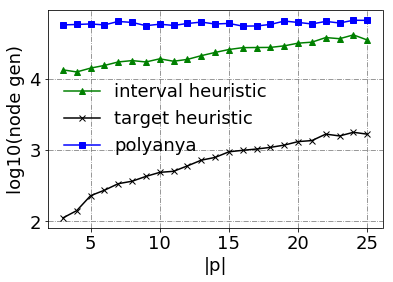

In [41]:
# Graph 1: [gen node, vnum]
x0, y0 = gen_xy(df[df.k <= 1], 'vnum', 'gen_ki')
x1, y1 = gen_xy(df[df.k <= 1], 'vnum', 'gen_hi')
x2, y2 = gen_xy(df[df.k <= 1], 'vnum' ,'gen_poly')
y0 = np.log10(y0)
y1 = np.log10(y1)
y2 = np.log10(y2)
plot_graph('|p|', 'log10(node gen)', [x0, x1, x2], [y0, y1, y2], ['interval heuristic', 'target heuristic', 'polyanya'])

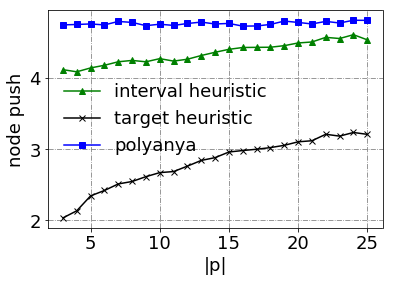

In [24]:
# Graph 2: [push node, vnum]
x0, y0 = gen_xy(df[df.k <= 1], 'vnum', 'push_ki')
x1, y1 = gen_xy(df[df.k <= 1], 'vnum', 'push_hi')
x2, y2 = gen_xy(df[df.k <= 1], 'vnum' ,'push_poly')
y0 = np.log10(y0)
y1 = np.log10(y1)
y2 = np.log10(y2)
plot_graph('|p|', 'node push', [x0, x1, x2], [y0, y1, y2], ['interval heuristic', 'target heuristic', 'polyanya'])

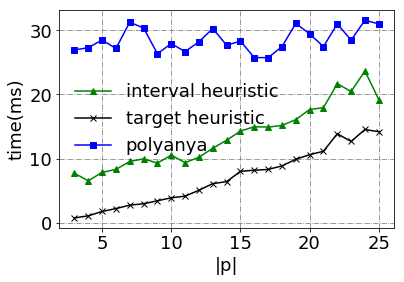

In [25]:
# Graph 4: [time, vnum]
x0, y0 = gen_xy(df[df.k == 1], 'vnum', 'cost_ki')
x1, y1 = gen_xy(df[df.k == 1], 'vnum', 'cost_hi')
x2, y2 = gen_xy(df[df.k == 1], 'vnum', 'cost_hi2')
x3, y3 = gen_xy(df[df.k == 1], 'vnum' ,'cost_polyanya')
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1]
y2 = [i / 1000 for i in y2]
y3 = [i / 1000 for i in y3]
plot_graph('|p|', 'time(ms)', [x0, x1, x3], [y0, y1, y3], ['interval heuristic', 'target heuristic', 'polyanya'])

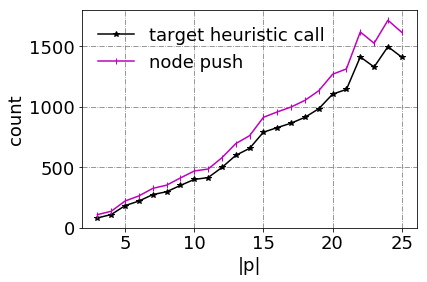

In [26]:
# Graph 5: [h-call, vnum]
x0, y0 = gen_xy(df[df.k == 1], 'vnum', 'hcall')
x1, y1 = gen_xy(df[df.k == 1], "vnum", 'push_hi')
plot_graph('|p|', 'count', [x0, x1], [y0, y1], ['target heuristic call', 'node push'])

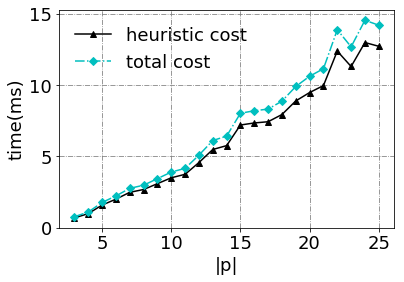

In [27]:
# Graph 6: [h-ratio, vnum]
x0, y0 = gen_xy(df, 'vnum', 'h_cost')
x1, y1 = gen_xy(df, 'vnum', 'cost_hi')
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1]
plot_graph('|p|', 'time(ms)', [x0, x1], [y0, y1], [
    'heuristic cost', 'total cost'])

### Explain

* Graph 1, 2, 3 show that the search space of the `heuristic` approach is always smaller than `knn` and `polyanya`.

* Graph 4 shows that the `heuristic` approach is the fastest when `vnum <=40`

* Graph 5, 6 explain the reason why the `heuristic` approach becomes slow when `vnum > 40`

## 2. Examine `poly num`

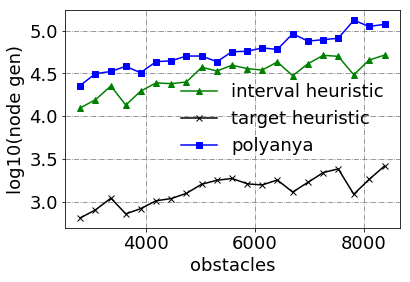

In [28]:
# Graph 7: [nodes gen, polys]
x0, y0 = gen_xy(df, 'polys', 'gen_ki')
x1, y1 = gen_xy(df, 'polys', 'gen_hi')
x2, y2 = gen_xy(df, 'polys', 'gen_poly')
y0 = np.log10(y0)
y1 = np.log10(y1)
y2 = np.log10(y2)
plot_graph('obstacles', 'log10(node gen)', [x0, x1, x2], [y0, y1, y2], ['interval heuristic', 'target heuristic', 'polyanya'])

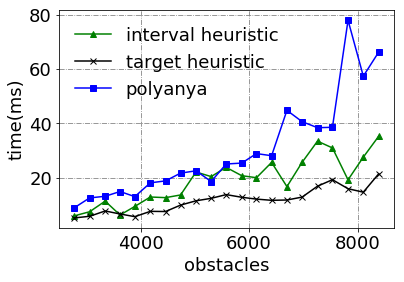

In [29]:
# Graph 8: [time, polys]
x0, y0 = gen_xy(df, 'polys', 'cost_ki')
x1, y1 = gen_xy(df, 'polys', 'cost_hi')
x2, y2 = gen_xy(df, 'polys', 'cost_polyanya')
x3, y3 = gen_xy(df, 'polys', 'cost_hi2')
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1]
y2 = [i / 1000 for i in y2]
y3 = [i / 1000 for i in y3]
plot_graph('obstacles', 'time(ms)', [x0, x1, x2], [y0, y1, y2], ['interval heuristic', 'target heuristic', 'polyanya'])

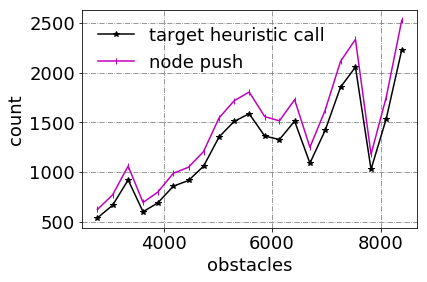

In [30]:
x0, y0 = gen_xy(df, 'polys', 'hcall')
x1, y1 = gen_xy(df, 'polys', 'push_hi')
x2, y2 = gen_xy(df, 'polys', 'hcall2')
plot_graph("obstacles", 'count', [x0, x1], [y0, y1], ['target heuristic call', 'node push'])

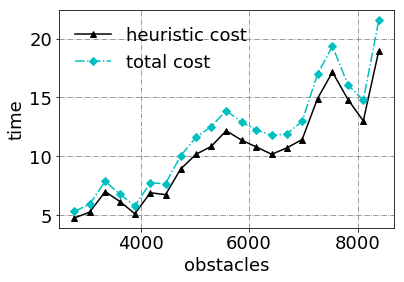

In [31]:
x0, y0 = gen_xy(df, 'polys', 'h_cost')
x1, y1 = gen_xy(df, 'polys', 'cost_hi')
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1]
plot_graph("obstacles", "time", [x0, x1], [y0, y1], ["heuristic cost", "total cost"])

### Explain

* Graph 7 shows that the search space of the `heuristic` approach is always smaller than `knn` and `polyanya`

* Graph 8 shows that the time is increasing when the number of obstacles increase, and `heuristic` is the fastest when `K=1`

## 3. Examine `points num`

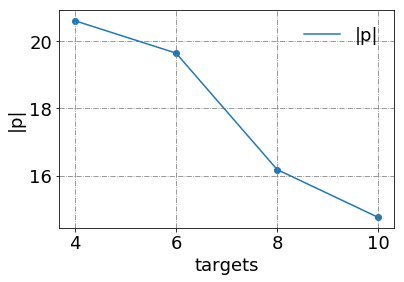

In [32]:
x0, y0 = gen_xy(df, 'pts', 'vnum')
plot_graph('targets', '|p|', [x0], [y0], ['|p|'])

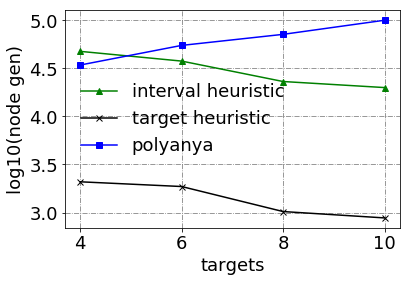

In [33]:
# Graph 9: [node push, pts]
x0, y0 = gen_xy(df, 'pts', 'gen_ki')
x1, y1 = gen_xy(df, 'pts', 'gen_hi')
x2, y2 = gen_xy(df, 'pts', 'gen_poly')
y0 = np.log10(y0)
y1 = np.log10(y1)
y2 = np.log10(y2)
plot_graph('targets', 'log10(node gen)', [x0, x1, x2], [y0, y1, y2], ['interval heuristic', 'target heuristic', 'polyanya'])

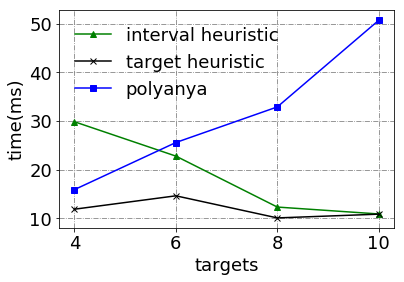

In [34]:
# Graph 10: [time, pts]
x0, y0 = gen_xy(df, 'pts', 'cost_ki')
x1, y1 = gen_xy(df, 'pts', 'cost_hi')
x2, y2 = gen_xy(df, 'pts', 'cost_polyanya')
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1]
y2 = [i / 1000 for i in y2]
plot_graph('targets', 'time(ms)', [x0, x1, x2], [y0, y1, y2], ['interval heuristic', 'target heuristic', 'polyanya'])

In [35]:
df1 = df
df1.head()

,k,order,dist,cost_polyanya,cost_ki,cost_hi,cost_hi2,h_cost,h_cost2,vnum,...,push_hi2,prune_hi2,hcall2,reevaluate2,precost,gen_pre,edgecnt,damcnt,pts,polys
0,1.0,1.0,14763.70,56062.7,6830.940,5011.920,1886.390,4621.0,1558.0,10.0,...,434.0,0.0,126.0,0.0,314709.0,334360.0,139510.0,305951.0,10.0,6133.0
1,1.0,1.0,5363.84,30264.4,456.723,486.293,250.753,454.0,222.0,7.0,...,49.0,0.0,16.0,0.0,314709.0,334360.0,139510.0,305951.0,10.0,6133.0
2,1.0,1.0,10357.90,29649.4,2114.660,2115.530,569.356,1995.0,467.0,7.0,...,166.0,0.0,37.0,0.0,314709.0,334360.0,139510.0,305951.0,10.0,6133.0
3,1.0,1.0,27160.70,20567.2,34003.500,25330.500,6720.600,23354.0,5240.0,32.0,...,1980.0,54.0,397.0,0.0,314709.0,334360.0,139510.0,305951.0,10.0,6133.0
4,1.0,1.0,11675.20,75017.3,3403.740,4279.240,1046.350,3958.0,804.0,10.0,...,366.0,1.0,66.0,0.0,314709.0,334360.0,139510.0,305951.0,10.0,6133.0


### Explain

* Graph 9 shows that the search space of `heuristic` and `knn` decreased by `pts`, and the search space of `heuristic` is smaller than others

* Graph 10 shows that the execution time of `heuristic` and `knn` decreased by `pts`, and `knn` is faster than `heuristic` when `pts >= 10`

## 4. Examine `K (|pts| = 10)`

In [36]:
df = df0[df0.pts >= 1]

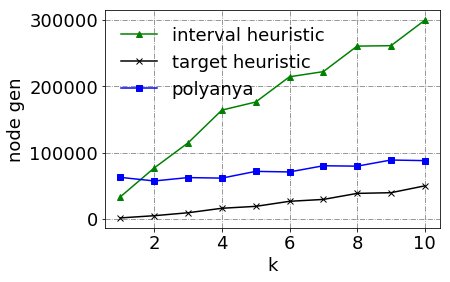

In [37]:
# Graph 11: [node push, K]
x0, y0 = gen_xy(df, 'k', 'gen_ki')
x1, y1 = gen_xy(df, 'k', 'gen_hi')
x2, y2 = gen_xy(df, 'k', 'gen_poly')
plot_graph('k', 'node gen', [x0, x1, x2], [y0, y1, y2], ['interval heuristic', 'target heuristic', 'polyanya'])

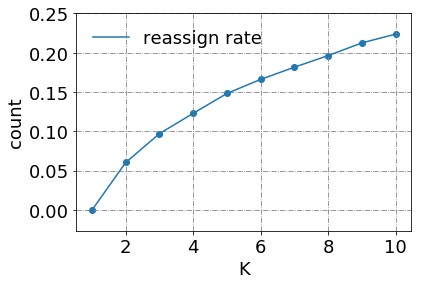

In [38]:
x2, y2 = gen_xy(df, 'k', 'push_hi', False)
x1, y1 = gen_xy(df, 'k', 'reevaluate2', False)
y1 = [float(y1[i]) / float(y2[i]) for i in range(len(x2))]
plot_graph('K', 'count', [x1], [y1], ['reassign rate'])

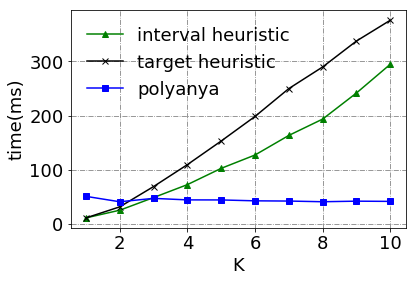

In [39]:
# Graph 12: [time, K]
x0, y0 = gen_xy(df[df.pts >= 10], 'k', 'cost_ki')
x1, y1 = gen_xy(df[df.pts >= 10], 'k', 'cost_hi')
x2, y2 = gen_xy(df[df.pts >= 10], 'k', 'cost_polyanya')
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1]
y2 = [i / 1000 for i in y2]
plot_graph('K', 'time(ms)', [x0, x1, x2], [y0, y1, y2], ['interval heuristic', 'target heuristic', 'polyanya'])

### Explain

* Graph 11: the search space of `heuristic` and `knn` are increased by `K`, and the search space of `heuristic` is always smaller than `polyanya`

* Graph 12 shows that the `heuristic` approach would be slower than others when `K>2`

* Graph 13 shows the reason why the `heuristic` approach becomes slow